In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# ------------------------------------------------------------------------------
from scipy.stats import shapiro, kstest

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_analisis= pd.read_csv("df_test.csv")
df_analisis.sample(4)

,user_id,age,gender,sleep_duration,stress_level,diet_type,daily_screen_time,exercise_frequency,caffeine_intake,reaction_time,memory_test_score,cognitive_score,ai_predicted_score
349,350,18,Female,4.3,6,Vegetarian,3.0,Low,41,588.83,96,36.14,35.50
76725,76726,22,Female,4.6,3,Non-Vegetarian,9.0,Medium,497,425.13,82,54.90,54.70
23304,23305,59,Male,6.5,4,Non-Vegetarian,5.7,High,22,210.62,81,100.00,100.00
36057,36058,50,Female,9.7,4,Vegetarian,2.3,Medium,313,496.69,54,50.91,54.97


In [3]:
df_analisis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             80000 non-null  int64  
 1   age                 80000 non-null  int64  
 2   gender              80000 non-null  object 
 3   sleep_duration      80000 non-null  float64
 4   stress_level        80000 non-null  int64  
 5   diet_type           80000 non-null  object 
 6   daily_screen_time   80000 non-null  float64
 7   exercise_frequency  80000 non-null  object 
 8   caffeine_intake     80000 non-null  int64  
 9   reaction_time       80000 non-null  float64
 10  memory_test_score   80000 non-null  int64  
 11  cognitive_score     80000 non-null  float64
 12  ai_predicted_score  80000 non-null  float64
dtypes: float64(5), int64(5), object(3)
memory usage: 7.9+ MB


In [4]:
df_analisis.columns

Index(['user_id', 'age', 'gender', 'sleep_duration', 'stress_level',
       'diet_type', 'daily_screen_time', 'exercise_frequency',
       'caffeine_intake', 'reaction_time', 'memory_test_score',
       'cognitive_score', 'ai_predicted_score'],
      dtype='object')

***Columnas en español:***

- Identificador de usuario
- Edad
- Género
- Duración del sueño
- Nivel de estrés
- Tipo de dieta
- Tiempo diario de pantalla
- Frecuencia de ejercicio
- Consumo de cafeína
- Tiempo de reacción
- Puntuación de la prueba de memoria
- Puntuación cognitiva
- Puntuación predicha por IA

1. ¿Cuál es la distribuciones de Número de Usuarios por Edad y Género?

In [12]:
df_analisis.groupby(['age', 'gender'])['user_id'].count().reset_index()

,age,gender,user_id
0,18,Female,919
1,18,Male,944
2,18,Other,78
3,19,Female,942
4,19,Male,899
...,...,...,...
121,58,Male,929
122,58,Other,85
123,59,Female,874
124,59,Male,907


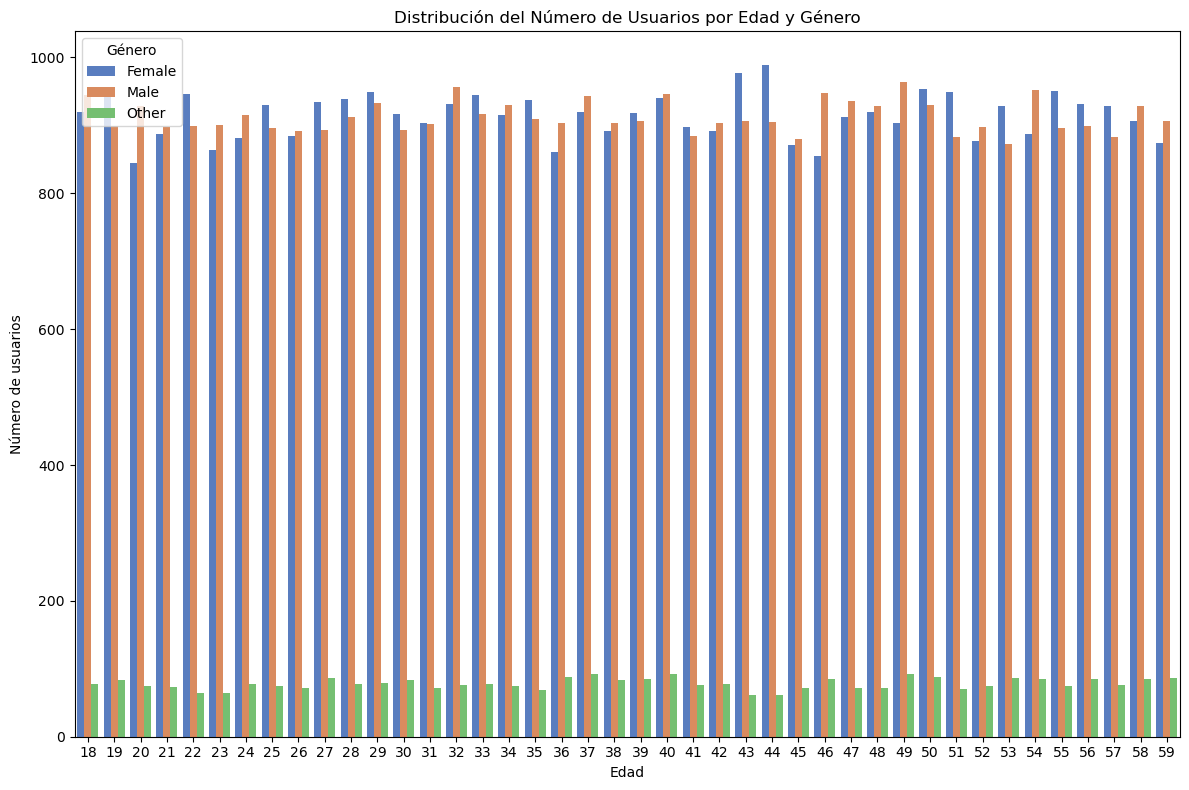

In [9]:
plt.figure(figsize=(12, 8)) # Tamaño de la gráfica
sns.countplot(x='age',
              data=df_analisis,
              hue="gender",
              palette="muted")

# Personalizar el gráfico
plt.title('Distribución del Número de Usuarios por Edad y Género') # Título más descriptivo
plt.xlabel('Edad')
plt.ylabel('Número de usuarios')
plt.legend(title='Género') # Añadir leyenda para entender los colores

# Mostrar el gráfico
plt.tight_layout()
plt.show()

2. ¿Cuál es la distribuciones de Duración del sueño por Edad y Género?

In [11]:
df_analisis.groupby(['age', 'gender'])['sleep_duration'].mean().reset_index()


,age,gender,sleep_duration
0,18,Female,7.094995
1,18,Male,6.992797
2,18,Other,7.076923
3,19,Female,7.014119
4,19,Male,6.960957
...,...,...,...
121,58,Male,6.986760
122,58,Other,6.902353
123,59,Female,7.026087
124,59,Male,6.878831


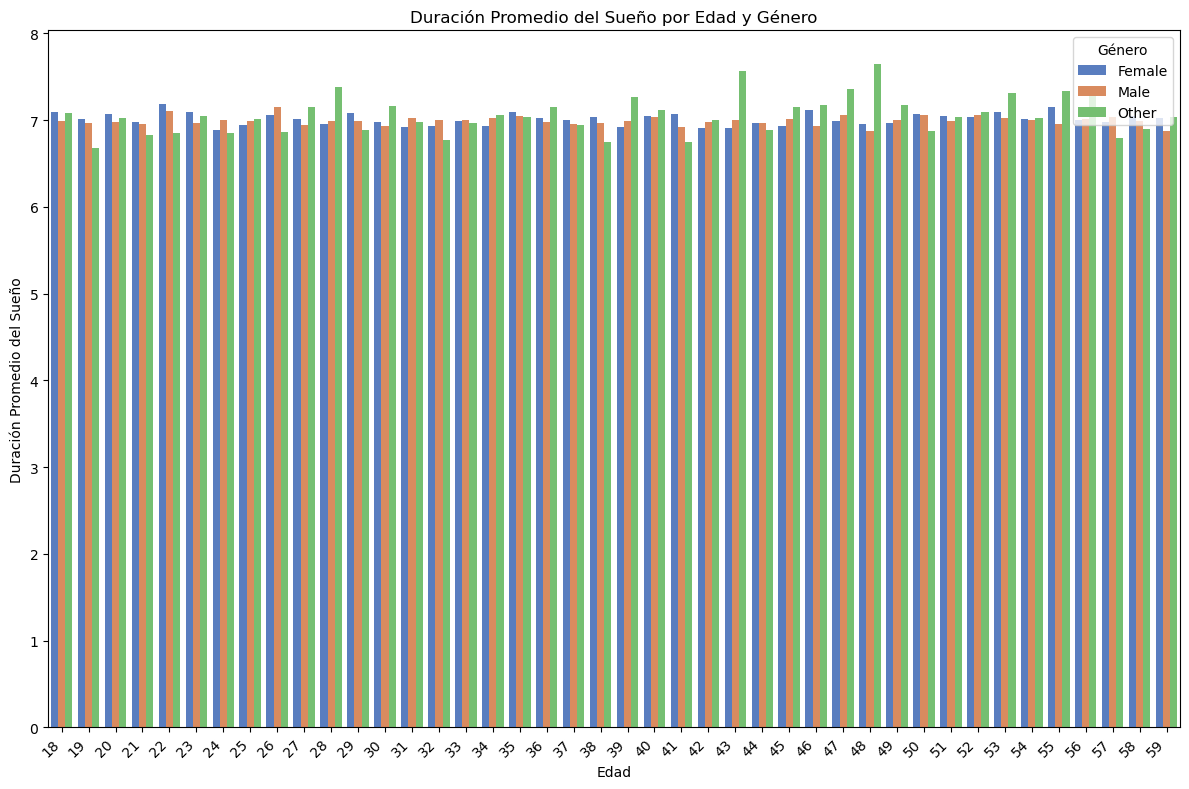

In [7]:
plt.figure(figsize=(12, 8))
sns.barplot(x='age',
            y='sleep_duration',
            hue='gender',
            data=df_analisis,
            palette='muted',
            errorbar=None) # Para quitar las barras de error (opcional)

plt.title('Duración Promedio del Sueño por Edad y Género')
plt.xlabel('Edad')
plt.ylabel('Duración Promedio del Sueño')
plt.legend(title='Género')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

3. ¿Cuál es la distribuciones de Duración del sueño por Edad y Género?

In [15]:
df_analisis.groupby(['age', 'gender'])['stress_level'].mean().reset_index()

,age,gender,stress_level
0,18,Female,5.468988
1,18,Male,5.495763
2,18,Other,5.371795
3,19,Female,5.376858
4,19,Male,5.531702
...,...,...,...
121,58,Male,5.531755
122,58,Other,5.164706
123,59,Female,5.473684
124,59,Male,5.573319


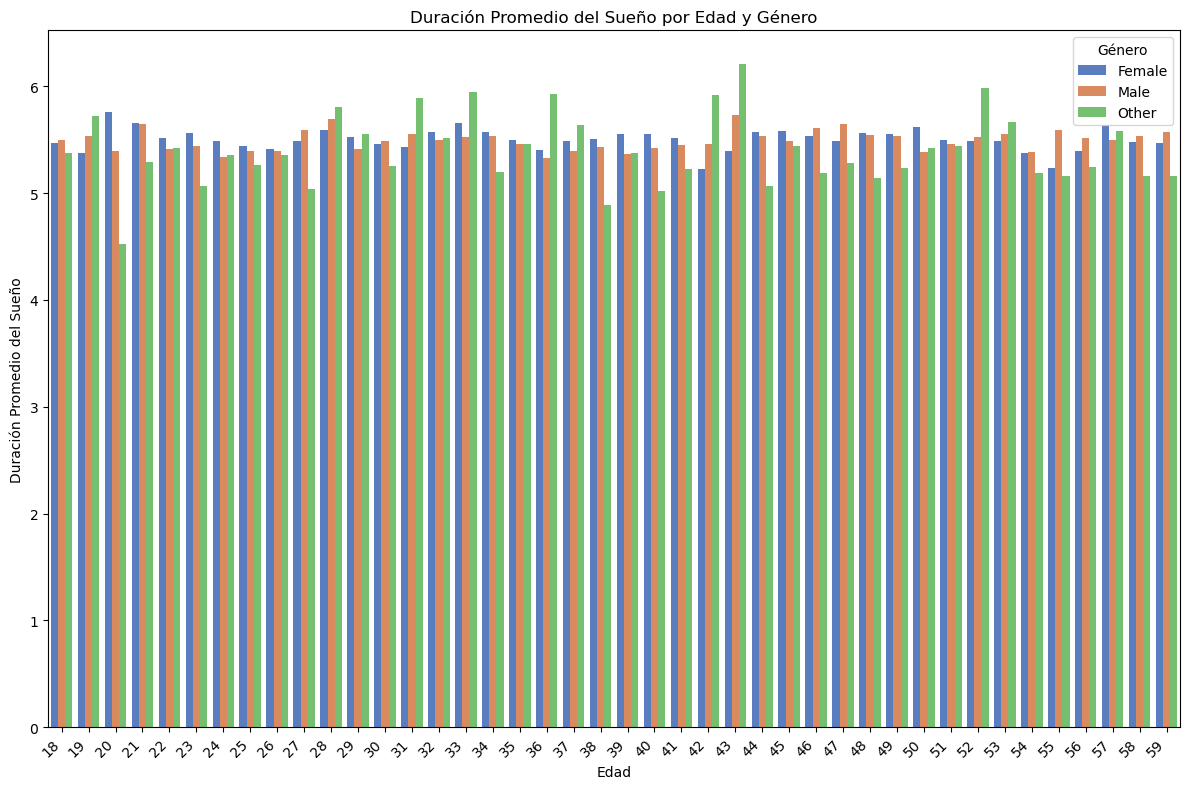

In [16]:
plt.figure(figsize=(12, 8))
sns.barplot(x='age',
            y='stress_level',
            hue='gender',
            data=df_analisis,
            palette='muted',
            errorbar=None) # Para quitar las barras de error (opcional)

plt.title('Duración Promedio del Sueño por Edad y Género')
plt.xlabel('Edad')
plt.ylabel('Duración Promedio del Sueño')
plt.legend(title='Género')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()